<a href="https://colab.research.google.com/github/stswee/IntroCompStatsHSSP2023/blob/main/Mini_Projects_Solutions/Intro_to_Comp_Statistics_Mini_Project_3_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computational Statistics (HSSP 2023 Edition)
## Mini-Project 3: Running Simulations

In this mini-project, you will expand on the in-class activities and run Monte Carlo simulations on your own. You will also perform bootstrapping to analyze a statistical problem.

### Monte Carlo Simulation

#### Exercise 1

In class, we estimated the value of π using a quarter circle. Now, what happens when we use a half circle or a whole circle (or some other fraction of a circle)?

The code below is the same as the one shown in class. Modify the code below to estimate π using a half circle, then a whole circle. If may be easier to modify the plotting code first to see if you are on the right track.

How fast do the errors converge to 0?

Bonus: Can you explain why the rate of convergence is faster/slower? (Hint: think about how variance is calculated)

In [1]:
# Load in packages
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Run Monte Carlo Simulation (no plot)
num_points = 10000

# Keep track of number of points
circle_points = 0
square_points = 0

# Generate points
for i in range(num_points):
  # Generate random x and y values
  x = random.uniform(-1, 1) # Use (-1, 1) for whole circle
  y = random.uniform(-1, 1) # Use (-1, 1) for whole circle

  # For semi-circle, set x for (-1, 1) and y for (0, 1) (and vice versa)

  # Determine distance from origin
  d = math.sqrt(x**2 + y**2)

  # If distance is less than 1, then the point is inside the quarter-circle
  if (d <= 1):
    circle_points += 1

  # Increase number of square points
  square_points += 1

  # Generate estimate for pi every 1000 points
  if ((i % 1000) == 0):
    pi = round(4 * circle_points / square_points, 4)
    error = round(math.pi - pi, 4)
    print("The estimate of pi is " + str(float(pi)) + " with an error of " + str(float(error)))


The estimate of pi is 4.0 with an error of -0.8584
The estimate of pi is 3.2248 with an error of -0.0832
The estimate of pi is 3.1764 with an error of -0.0348
The estimate of pi is 3.139 with an error of 0.0026
The estimate of pi is 3.1352 with an error of 0.0064
The estimate of pi is 3.1346 with an error of 0.007
The estimate of pi is 3.1588 with an error of -0.0172
The estimate of pi is 3.1373 with an error of 0.0043
The estimate of pi is 3.1386 with an error of 0.003
The estimate of pi is 3.1348 with an error of 0.0068


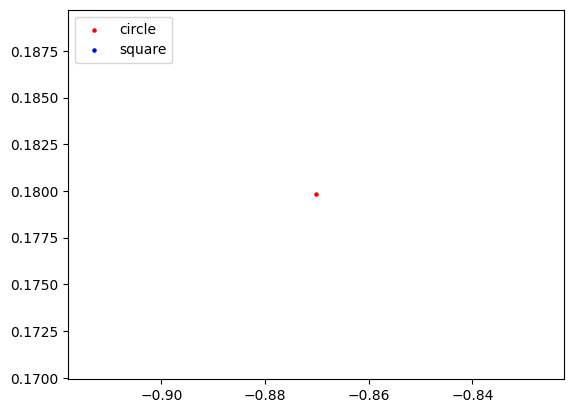

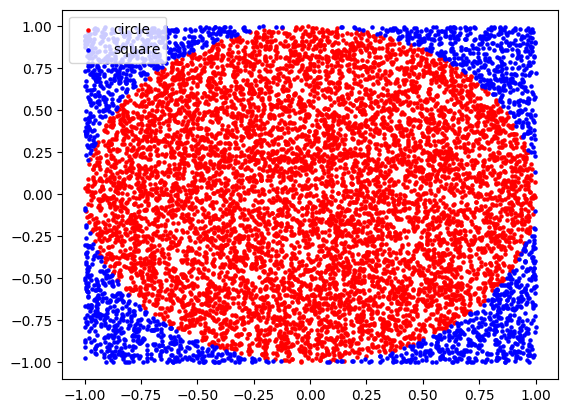

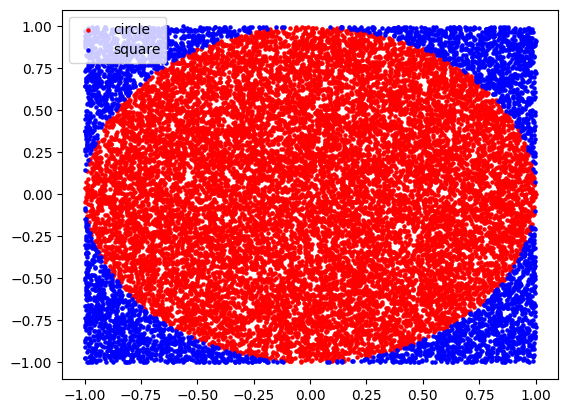

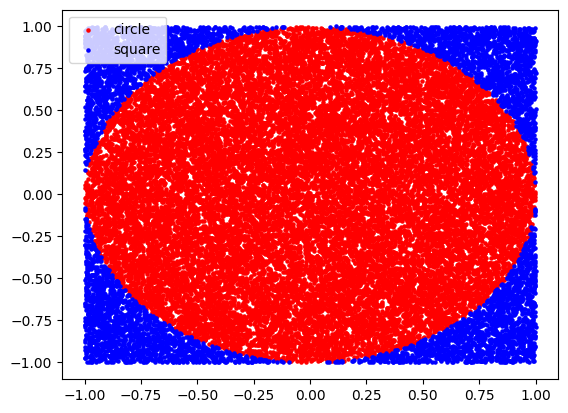

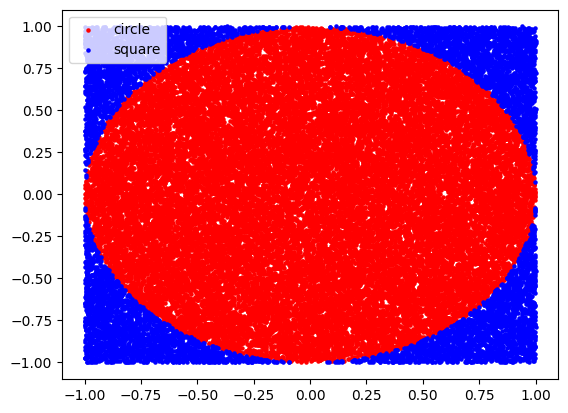

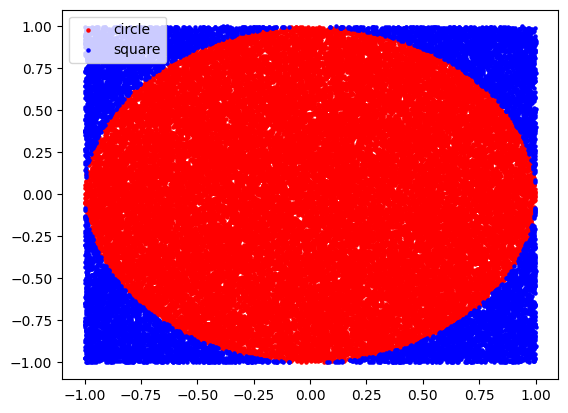

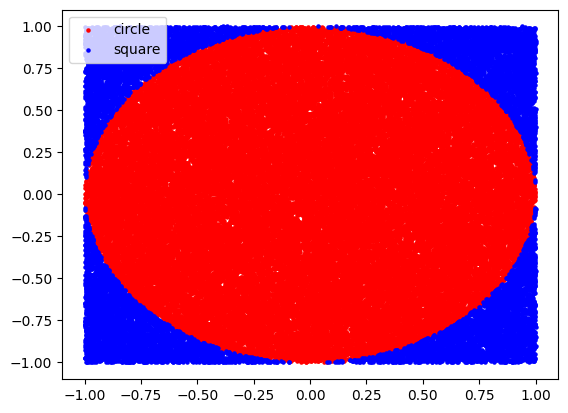

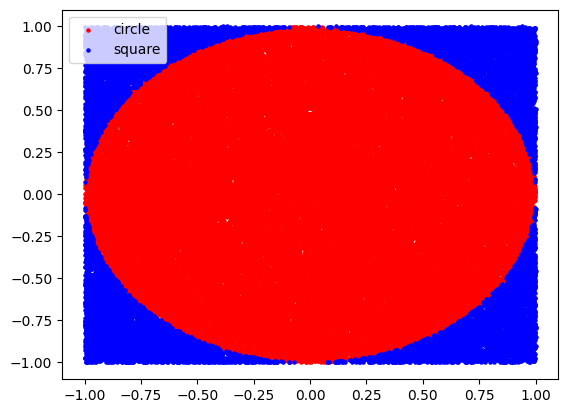

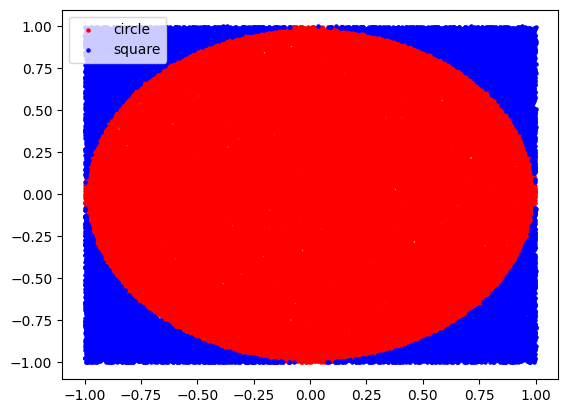

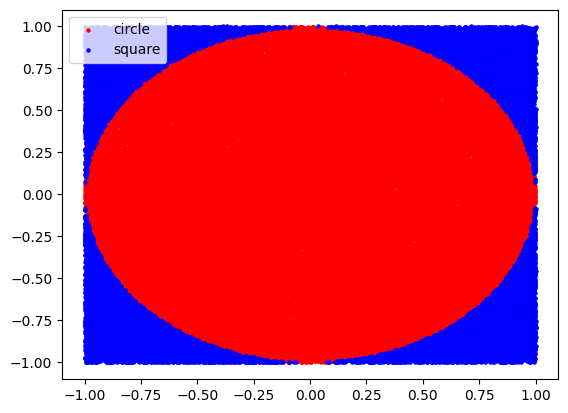

In [3]:
# Run Monte Carlo Simulation (with plot)
num_points = 100000

# Keep track of number of points
circle_points = 0
square_points = 0

# Store points
circle_storage = np.empty([0, 2])
square_storage = np.empty([0, 2])

# Generate points
for i in range(num_points):
  # Generate random x and y values
  x = random.uniform(-1, 1) # Modify me!
  y = random.uniform(-1, 1) # Modify me!

  # Determine distance from origin
  d = math.sqrt(x**2 + y**2)

  # If distance is less than 1, then the point is inside the quarter-circle
  if (d <= 1):
    circle_points += 1
    circle_storage = np.append(circle_storage, [[x, y]], axis = 0)
  else:
    square_storage = np.append(square_storage, [[x, y]], axis = 0)

  # Increase number of square points
  square_points += 1

  # Generate a plot for pi every 10000 points
  if ((i % 10000) == 0):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(circle_storage[:,0], circle_storage[:,1], s=5, c='r', marker="o", label='circle')
    ax1.scatter(square_storage[:,0], square_storage[:,1], s=5, c='b', marker="o", label='square')
    plt.legend(loc='upper left')
    plt.show()


The more of the circle we sample from, the faster the errors converge to 0. In other words, using the full circle leads to smaller errors faster than using the quarter circle.

The reason for this is based on how variance and standard deviation are calculated. When using a quarter circle, we had to multiply by 4 to get an accurate estimate for pi. When multiplying by a constant, the errors are magnified.

For the variance, when multiplying by a constant, we have to multiply by the constant squared. For the standard deviation, we have to multiply by the constant. In both cases, the error becomes magnified and thus, the errors remain relatively larger and converge more slowly.

#### Exercise 2

Monte Carlo simulations can also be used to estimate the area under the curve. Below is a graph of f(x) = x^2 on the interval [-2, 2].

Should you solve for the area under the curve exactly (using calculus), you would get an area of 16/3, or approximately 5.333.

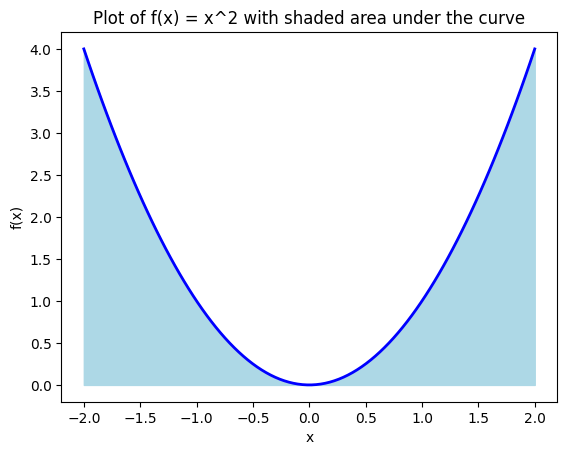

In [4]:
def f(x):
    return x ** 2

x = np.linspace(-2, 2, 100)  # Interval [-2, 2]
y = f(x)

plt.plot(x, y, 'b-', linewidth=2)  # Plot the function f(x) = x^2

# Shade the area under the curve in the interval [-2, 2]
x_fill = np.linspace(-2, 2, 100)
y_fill = f(x_fill)
plt.fill_between(x_fill, y_fill, color='lightblue')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = x^2 with shaded area under the curve')
plt.show()


Write code for a Monte Carlo simulation to estimate the area under the curve.

In [11]:
# Write your code here
# Hint: It is a great idea to reuse code from before to help you out

# Run Monte Carlo Simulation (with plot)
num_points = 100000

# Keep track of number of points
under_curve_points = 0
rectangle_points = 0

# Store points
under_curve_storage = np.empty([0, 2])
rectangle_storage = np.empty([0, 2])

# Generate points
for i in range(num_points):
  # Generate random x and y values
  x = random.uniform(-2, 2) # Modify me!
  y = random.uniform(0, 4) # Modify me!

  # If y is less than f(x), then the point is below the curve
  if (y <= f(x)):
    under_curve_points += 1
    under_curve_storage = np.append(under_curve_storage, [[x, y]], axis = 0)
  else:
    rectangle_storage = np.append(rectangle_storage, [[x, y]], axis = 0)

  # Increase number of square points
  rectangle_points += 1

  # Generate a plot and estimate for area under curve every 10000 points
  if ((i % 10000) == 0):
    estimate = round(under_curve_points / rectangle_points * 16, 4) # Note: We need to multiply by the rectangular area (16) to get our estimate!
    error = round(16/3 - estimate, 4)
    print("The estimate of the area under the curve is " + str(float(estimate)) + " with an error of " + str(float(error)))


The estimate of the area under the curve is 0.0 with an error of 5.3333
The estimate of the area under the curve is 5.2955 with an error of 0.0378
The estimate of the area under the curve is 5.3765 with an error of -0.0432
The estimate of the area under the curve is 5.347 with an error of -0.0137
The estimate of the area under the curve is 5.3439 with an error of -0.0106
The estimate of the area under the curve is 5.3391 with an error of -0.0058
The estimate of the area under the curve is 5.3359 with an error of -0.0026
The estimate of the area under the curve is 5.3464 with an error of -0.0131
The estimate of the area under the curve is 5.3477 with an error of -0.0144
The estimate of the area under the curve is 5.353 with an error of -0.0197


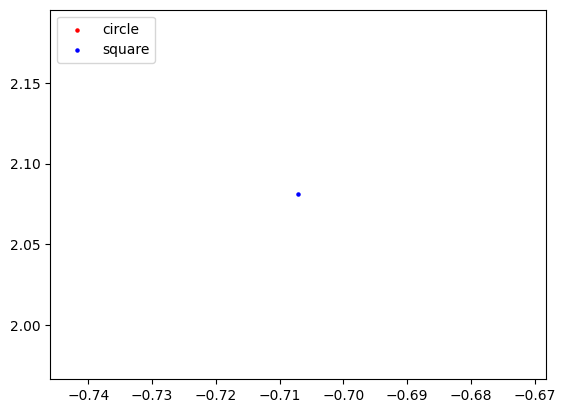

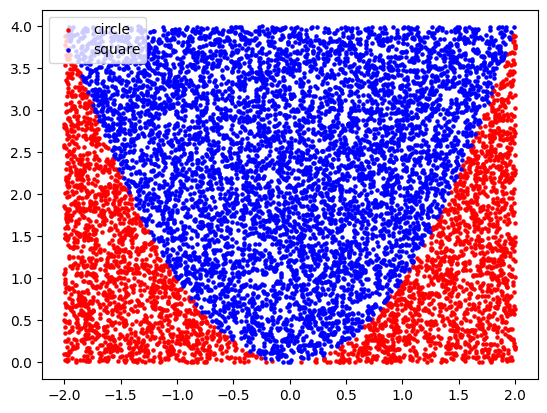

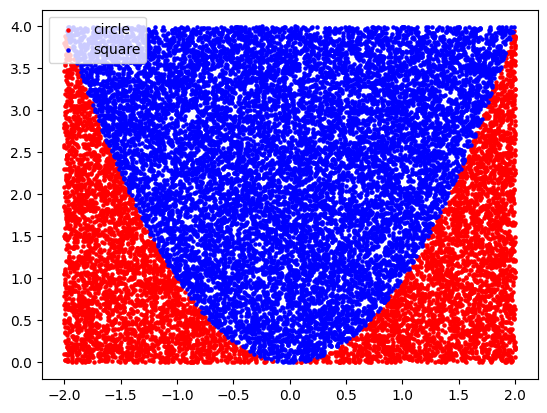

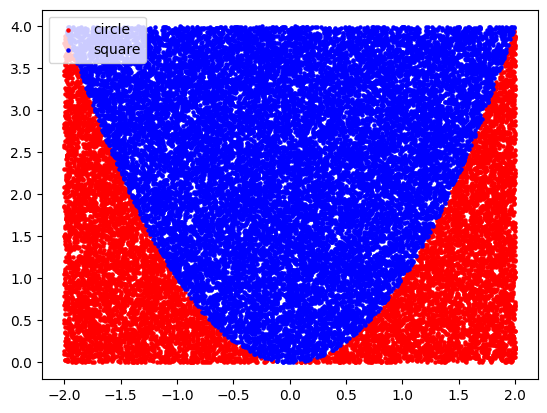

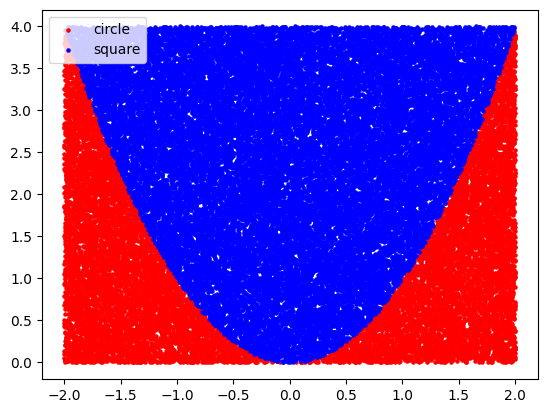

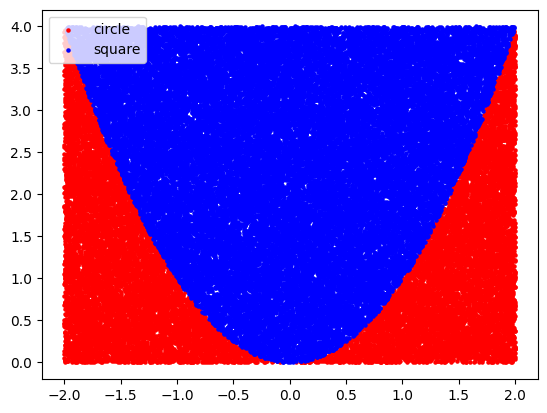

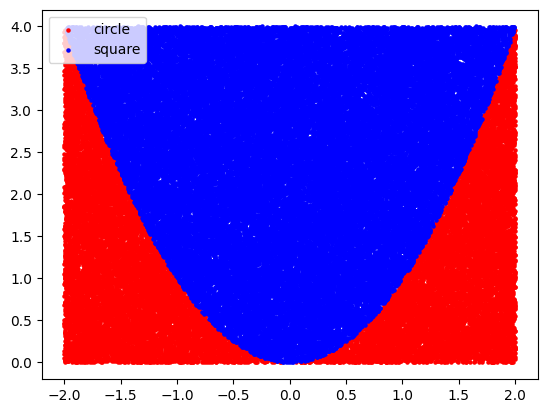

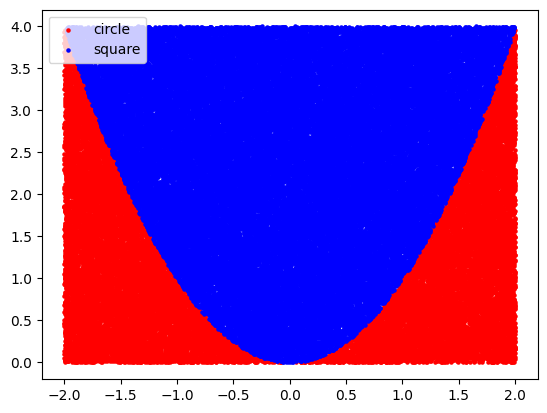

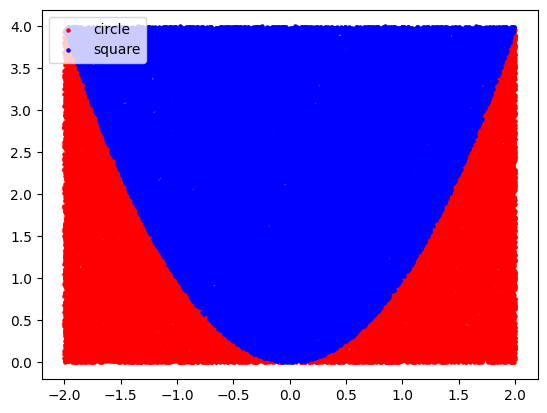

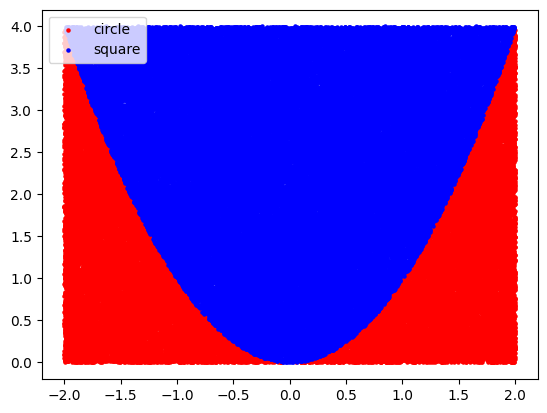

In [12]:
# Write your code here
# Hint: It is a great idea to reuse code from before to help you out

# Run Monte Carlo Simulation (with plot)
num_points = 100000

# Keep track of number of points
under_curve_points = 0
rectangle_points = 0

# Store points
under_curve_storage = np.empty([0, 2])
rectangle_storage = np.empty([0, 2])

# Generate points
for i in range(num_points):
  # Generate random x and y values
  x = random.uniform(-2, 2) # Modify me!
  y = random.uniform(0, 4) # Modify me!

  # If y is less than f(x), then the point is below the curve
  if (y <= f(x)):
    under_curve_points += 1
    under_curve_storage = np.append(under_curve_storage, [[x, y]], axis = 0)
  else:
    rectangle_storage = np.append(rectangle_storage, [[x, y]], axis = 0)

  # Increase number of square points
  rectangle_points += 1

  # Generate a plot and estimate for area under curve every 10000 points
  if ((i % 10000) == 0):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(under_curve_storage[:,0], under_curve_storage[:,1], s=5, c='r', marker="o", label='circle')
    ax1.scatter(rectangle_storage[:,0], rectangle_storage[:,1], s=5, c='b', marker="o", label='square')
    plt.legend(loc='upper left')
    plt.show()
